<p class="pull-left">
ANLT 212 - Analytics Computing
</p>
<div class="pull-right">
<ul class="list-inline">
Copyright © Trang Vu 2019
</ul>
</div>

<font color='Navy' size=3><em> by Trang Vu - 989357826<br>
Module 9 Report - Food Choices </em>

# <font color='brown' size=10><center>MODULE 9 REPORT - <em> Food Choices </em>

<div class="pull-left"><img src="https://lh3.googleusercontent.com/lJn1NgigIuLTok7HfumKoM5s9_u-Zl2CxGsZDCPpTyYJUS1I38_g3Jw57QX1mTKkxojyQv2FEB51lMTdZDPW_CU6Hwas_kkriEilzolgQ42DL_O8doFbtqN7ySNHCQyycOrL_ObNmg=w2400"
alt="Drawing" style="width: 450px;"/></div>
<div class="pull-right">
<ul class="list-inline">
<img src="https://lh3.googleusercontent.com/RV2feL-JZACxptHrtaRSo7sp0eCT-_ueQX5okwriRjZhO9UaJP7KbY8vIwdwBkfxk1X8ONgzhNU3Lr923PI7O6um_EAP1SsAEX-gCnjQrXOxF4t-14zrVFBs4IwXnoo5XPaqk2eKjQ=w2400"
alt="Food" style="width: 450px;"/></ul></div>

<a id="contents"></a>
<div>
    <h1>
    Table of Contents
    </h1>
    <br>
    1. <a href='#intro'>Objective of the Report</a><br>
    2. <a href='#dataExp'>Data Exploration</a><br>
    3. <a href='#Dendro'>Dendrogram</a><br>
    4. <a href='#Kmeans'>Step-by-step K-means</a><br>
    5. <a href='#Sklearn'>Sklearn.cluster</a><br>
    6.<a href='#Predict'>Prediction</a><br>
    7.<a href='#Sum'>Summary</a><br>
</div>

<a id="intro"></a>
<div>
    <h1><font color='Grey' size=6>
       1. Objective of the Project
    </h1> 
</div>

In this report, I would like to pay attention on different habits and different target customers who are interested in
different types of foods and eating habit and their eating hobbies could really be affected by their background, their
characteristics, their weight perspective, and their preference for comfort food and so habit to whether eating out and
spending time at home cooking.A new all-you-can-eat buffet at the University of the Pacific hired me to create a recommendation engine for email coupon campaigns. My engine will send targeted emails to students with coupons that are likely to encourage them to come. 

My objectives for this project is to get into exploring the data to learn about the different type of information 
gathered in the survey, different variables or types of data as well what kind of aspects I could pay more attention 
than other among all for example coffee, breakfast, italian food and so on. Base on what I learn on exploring the data,
I will take a step further to gather and utilizing dendogram to define the cluster amount of the data as well as 
direction that I should go from there in the clustering journey in the dataset.

Going deepter, I would like to create function to define centroids and solution for the data as well as the best possibility of clustered data so that from there I could pick the best characteristics of Pacific student that are predictable and provide algorithm for the coupon accordingly.

<a id="dataExp"></a>
<div>
    <h1><font color='Grey' size=6>
       2. Data Exploration 
    </h1> 
</div>

In [1]:
# Preparation for pandas 
import pandas as pd
# Preparation for csv
import csv

In [2]:
# Loading the data file using read.csv function and reading the data in the Python3 environment.
food_data = pd.read_csv("food_coded.csv")

***Let's see the first five rows of our datasets***

In [3]:
food_data.head(5)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


***Let's see the last five rows of our datasets***

In [4]:
food_data.tail(5)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135
124,3.9,1,1,430,NaN,315.0,2,"Chocolates, pizza, and Ritz.","hormones, Premenstrual syndrome.",NaN,...,1.0,2.0,2,725.0,345,NaN,4,2,575,135


***Let's see the columns's name of our datasets***

In [5]:
food_data.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded2',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       '

***Let's see how many rows and columns we have in our datasets***

In [6]:
# Using shape function
food_data.shape

(125, 61)

***Let's see some comprehensive general information of our datasets like index, count, max,min, mean, median***

In [7]:
# Let's describe index
food_data.index

RangeIndex(start=0, stop=125, step=1)

In [8]:
# Check out general info of our datasets
food_data.describe()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded2,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,125.000000,108.000000,...,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,1.388889,...,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,1.910987,0.974759,...,1.423824,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,1.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,1.000000,...,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,6.000000,...,5.000000,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


In [9]:
# Let's check data type of some variables in our dataset
food_data[['GPA','Gender','breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded',
       'cuisine', 'diet_current', 'diet_current_coded','on_off_campus','parents_cook']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 17 columns):
GPA                           123 non-null object
Gender                        125 non-null int64
breakfast                     125 non-null int64
calories_chicken              125 non-null int64
calories_day                  106 non-null float64
calories_scone                124 non-null float64
coffee                        125 non-null int64
comfort_food                  124 non-null object
comfort_food_reasons          124 non-null object
comfort_food_reasons_coded    106 non-null float64
cook                          122 non-null float64
comfort_food_reasons_coded    106 non-null float64
cuisine                       108 non-null float64
diet_current                  124 non-null object
diet_current_coded            125 non-null int64
on_off_campus                 124 non-null float64
parents_cook                  125 non-null int64
dtypes: float64(7), int64(6), object(4)
memo

***Let's see summary of our datasets***

In [10]:
# Using sum() function to calculate the sum of the values for each numeric variables that we are interested in 
# like different type of food and meal types.
sumfood = food_data[['coffee','breakfast','calories_day','self_perception_weight','nutritional_check','fruit_day','ethnic_food','comfort_food','italian_food','cook','soup','persian_food','thai_food','veggies_day','greek_food','indian_food','healthy_meal','fries','pay_meal_out']].sum()
sumfood.sort_values()

fries                     136.0
breakfast                 139.0
soup                      151.0
coffee                    219.0
calories_day              321.0
cook                      340.0
persian_food              348.0
self_perception_weight    387.0
nutritional_check         394.0
indian_food               394.0
thai_food                 417.0
pay_meal_out              426.0
greek_food                436.0
ethnic_food               468.0
veggies_day               501.0
fruit_day                 528.0
italian_food              591.0
dtype: float64

***Let's see how high GPA could related to the type of food for breakfast and how likely that having veggies day and also what type of sports that students play***

In [11]:
# Let's see how many input values we have for breakfast column
# Base on the instruction, we know that 1 is refered to cereal and 2 is refered to donut
food_data.breakfast.unique()

array([1, 2])

In [12]:
# Using sort() function to sort GPA in descending order to see the correlation of values in others columns
# We have top 5 student has the highest columns 
# now we can see their eating and food habits
recordmost = food_data[food_data.GPA != 'Unknown'][['type_sports','GPA','breakfast','veggies_day']].sort_values(['GPA'],ascending=False).dropna()
recordmost.head(5)

,type_sports,GPA,breakfast,veggies_day
71,Softball,4,1,5
31,none organized,4,1,5
30,snowboarding,4,1,5
96,Soccer,3.92,1,2
11,Running,3.904,1,5


After exploration of the data, It is significant to define that students of University of Pacific tends to enjoy italian
food as well as have high possibility to pay meal out and enjoy veggies day.

<a id="Dendro"></a>
<div>
    <h1><font color='Grey' size=6>
       3. Dendrogram 
    </h1> 
</div>

***Let's do some data cleaning for GPA columns***

In [13]:
# Change those values of GPA columns being Personal to 0
food_data.loc[food_data.GPA == 'Personal '] = ''

In [14]:
# Change those values of GPA columns being Personal to 0
food_data.loc[food_data.GPA == 'Personal'] = ''

In [15]:
# Change those values of GPA columns being Unknown to 0
food_data.loc[food_data.GPA == "Unknown"] = ""

In [16]:
# Convert the data type of GPA, mother_education and father_education column into numeric values
food_data['GPA'] = pd.to_numeric(food_data['GPA'],errors = 'coerce')
food_data['mother_education'] = pd.to_numeric(food_data['mother_education'],errors = 'coerce')
food_data['father_education'] = pd.to_numeric(food_data['father_education'],errors = 'coerce')

In [17]:
# Let's see if we convert the data sucessully
food_data[['GPA','father_education','mother_education']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
GPA                 121 non-null float64
father_education    122 non-null float64
mother_education    120 non-null float64
dtypes: float64(3)
memory usage: 3.0 KB


In [18]:
#Let's use interpolate to fill in all null or missing values in the food_data
food_data["GPA"] = food_data["GPA"].interpolate()

In [19]:
food_data.shape

(125, 61)

In [20]:
#Let's have a quick glance of what we have here 
food_data['GPA'].isnull().tail(5)

120    False
121    False
122    False
123    False
124    False
Name: GPA, dtype: bool

***In this section, I would like to create index for the dataset by creating new column named ID being the assumption
of GPA, father education and mother education of the student***

In [30]:
food_data['GPAandEdu'] = food_data.GPA + food_data.mother_education  + food_data.father_education

In [31]:
# Use interpolate to fill in the missing value
# Let's have a quick glance of what we have here
food_data['GPAandEdu'] = food_data['GPAandEdu'].interpolate()

***In this part, I would like to select 5 columns of my choices for creating dendogram, I would like to select 
GPA, comfort_food_reasons_coded, calories_day, nutritional_check , veggies_day, self_perception_weight***

In [35]:
subfooddata = food_data[['GPA','GPAandEdu','comfort_food_reasons_coded', 'nutritional_check','veggies_day','self_perception_weight']]

In [39]:
# Handling missing values
subfooddata = subfooddata.dropna()

In [40]:
subfooddata.head(5)

,GPA,GPAandEdu,comfort_food_reasons_coded,nutritional_check,veggies_day,self_perception_weight
0,2.400,8.400,9,5,5,3
1,3.654,9.654,1,4,4,3
2,3.300,7.300,1,4,5,6
3,3.200,9.200,2,2,3,5
4,3.500,12.500,1,3,4,4


In [41]:
subfooddata.shape

(105, 6)

In [90]:
subfooddata = subfooddata.dropna()

In [91]:
# Convert to numeric values
subfooddata['comfort_food_reasons_coded'] = pd.to_numeric(subfooddata['comfort_food_reasons_coded'],errors = 'coerce')
subfooddata['nutritional_check'] = pd.to_numeric(subfooddata['nutritional_check'],errors = 'coerce')
subfooddata['veggies_day'] = pd.to_numeric(subfooddata['veggies_day'],errors = 'coerce')
subfooddata['self_perception_weight'] = pd.to_numeric(subfooddata['self_perception_weight'],errors = 'coerce')

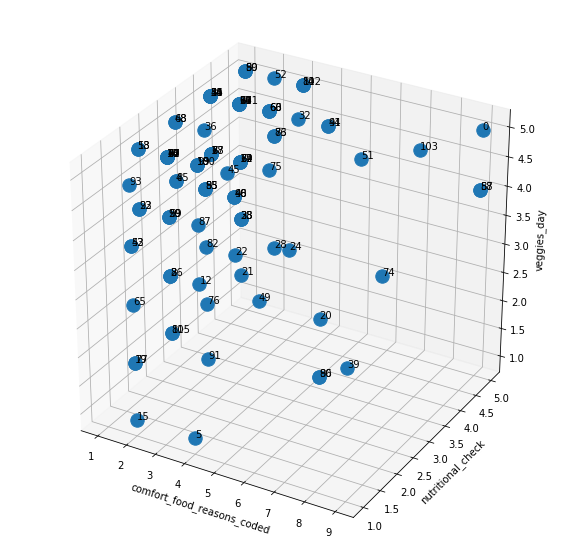

In [92]:
# Using Axes3D toolkits to plot the dataset out to see the clusters of
# three columns comfort_food_reasons_coded,nutritional_check and veggies_day
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = subfooddata.comfort_food_reasons_coded, ys = subfooddata.nutritional_check, zs = subfooddata.veggies_day, s= 180, depthshade = False)
for x, y, z, l in zip(subfooddata.comfort_food_reasons_coded, subfooddata.nutritional_check, subfooddata.veggies_day, subfooddata.index):
    ax.text(x, y, z, l)
    
ax.set_xlabel('comfort_food_reasons_coded')
ax.set_ylabel('nutritional_check')
ax.set_zlabel('veggies_day')

plt.show()

In [99]:
# Lets create and see distances of clusters
from sklearn.metrics.pairwise import euclidean_distances
food_distance_df = (euclidean_distances(subfooddata))
food_distance_df.astype(int)

array([[0, 8, 8, ..., 8, 4, 8],
       [8, 0, 3, ..., 4, 7, 3],
       [8, 3, 0, ..., 6, 8, 5],
       ...,
       [8, 4, 6, ..., 0, 5, 5],
       [4, 7, 8, ..., 5, 0, 7],
       [8, 3, 5, ..., 5, 7, 0]])

### Dendogram


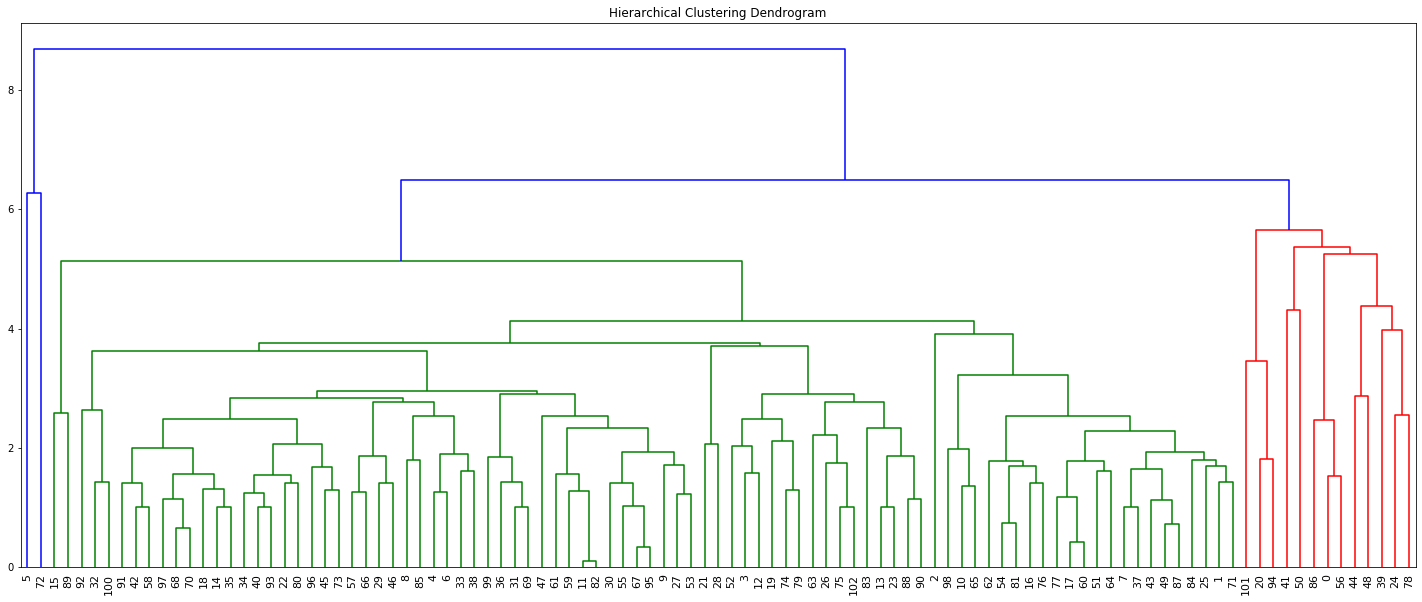

In [104]:
# Let's create dendogram to define k number of the clusters
Z = linkage(subfooddata, 'average')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, leaf_font_size =11.)
plt.show()

In [105]:
# Let's take a look of what we have here
Z[0]

array([11.       , 82.       ,  0.1046518,  2.       ])

In [589]:
# Let's take a look of what we have here
Z[3]

array([68.       , 70.       ,  0.6512488,  2.       ])

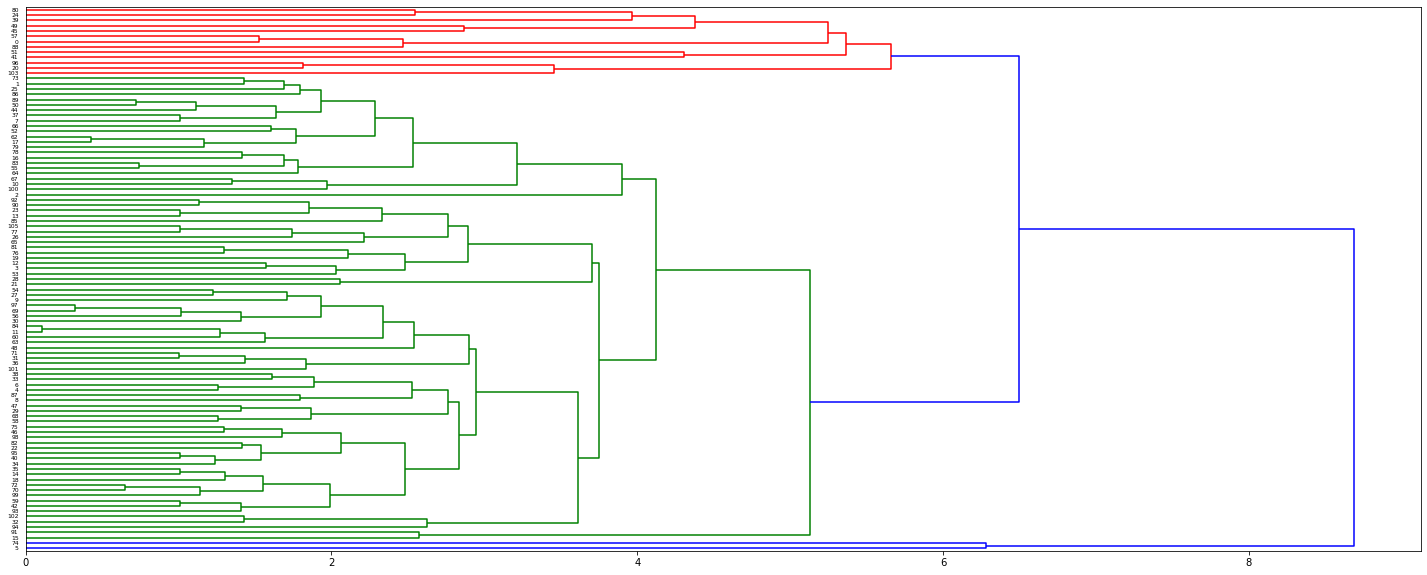

In [118]:
# Let's plot it out to see our dendogram in detail
plt.figure(figsize=(25, 10))
D = dendrogram(Z=Z, orientation="right", leaf_font_size=6, 
               labels = subfooddata.index)

### Multiple k mean evaluations

#### Plotting Clusters with k = 4

Let's try to plot the cluster out with K means value being 4

In [748]:
# Let's create a sub data for three particular columns
subfooddata0 = subfooddata[['comfort_food_reasons_coded','nutritional_check','veggies_day']]

In [749]:
# Clustering them out
from scipy.cluster.hierarchy import fcluster
k=5
dend_clusters = fcluster(Z, k, criterion='maxclust')
dend_clusters

array([5, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3,
       3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 5, 3, 3,
       5, 3, 3, 3, 5, 3, 5, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 5, 3,
       3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3], dtype=int32)

[[ 3.28        9.46333333  7.5         3.          3.66666667  3.58333333]
 [ 3.41115094 11.70784906  2.20754717  3.          4.03773585  2.94339623]
 [ 3.46378947  8.59128947  1.86842105  3.34210526  4.18421053  3.05263158]]


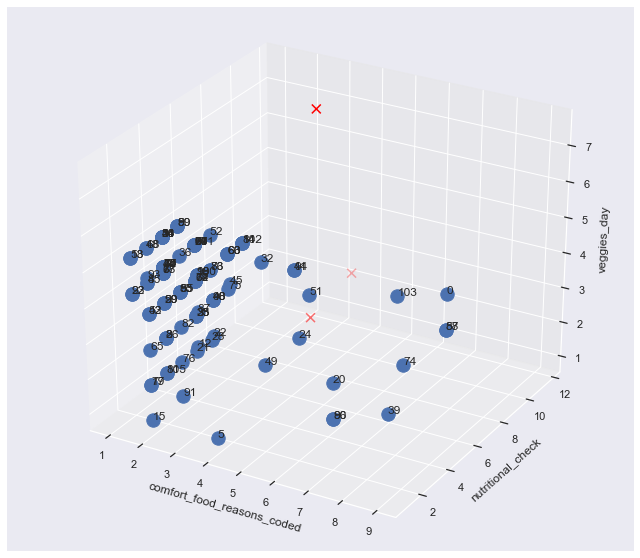

In [747]:
# Let's plot it out
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
kmeans = KMeans(n_clusters=3).fit(subfooddata)
centroids = kmeans.cluster_centers_
print(centroids)
# subfooddata.comfort_food_reasons_coded, subfooddata.nutritional_check, subfooddata.veggies_day
ax.scatter(xs = subfooddata0.comfort_food_reasons_coded, ys = subfooddata0.nutritional_check, zs = subfooddata0.veggies_day, 
           s = 180, depthshade = False)
ax.scatter(centroids[:, 0], centroids[:, 1],centroids[:, 2],centroids[:, 3], marker="x", c='red', s = 80)


for x, y, z, l in zip(subfooddata0.comfort_food_reasons_coded, subfooddata0.nutritional_check, subfooddata0.veggies_day, subfooddata.index):
    ax.text(x, y, z, l) 
    
ax.set_xlabel('comfort_food_reasons_coded')
ax.set_ylabel('nutritional_check')
ax.set_zlabel('veggies_day')

plt.show()

In overall, I would like to demonstrate the fact that it looks like the best way to cluster data is with the kmeans 
number being 3 rather than 4 since the pattern of data and the grouping in accordance to dendogram and other technique
that I have used in this section. I would like to define K means as 3 as an ideal to dig deeper into further of the
report.

<a id="Kmeans"></a>
<div>
    <h1><font color='Grey' size=6>
       4. Step-by-step K-means
    </h1> 
</div>

In [135]:
# Implementing neccessary tools for this section to be acomplished
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from scipy.cluster.hierarchy import linkage, dendrogram
 
import pandas as pd
import numpy as np

# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 60)
pd.set_option('display.width', 1000)
 
%matplotlib inline

### Random Cendroids according to the k that I determined

[[ 8.66234211  3.26315789  1.78947368]
 [ 9.29692308  3.15384615  7.30769231]
 [11.74069231  3.01923077  2.21153846]]


Text(0.5, 0, 'comfort_food_reasons_coded')

<Figure size 432x288 with 0 Axes>

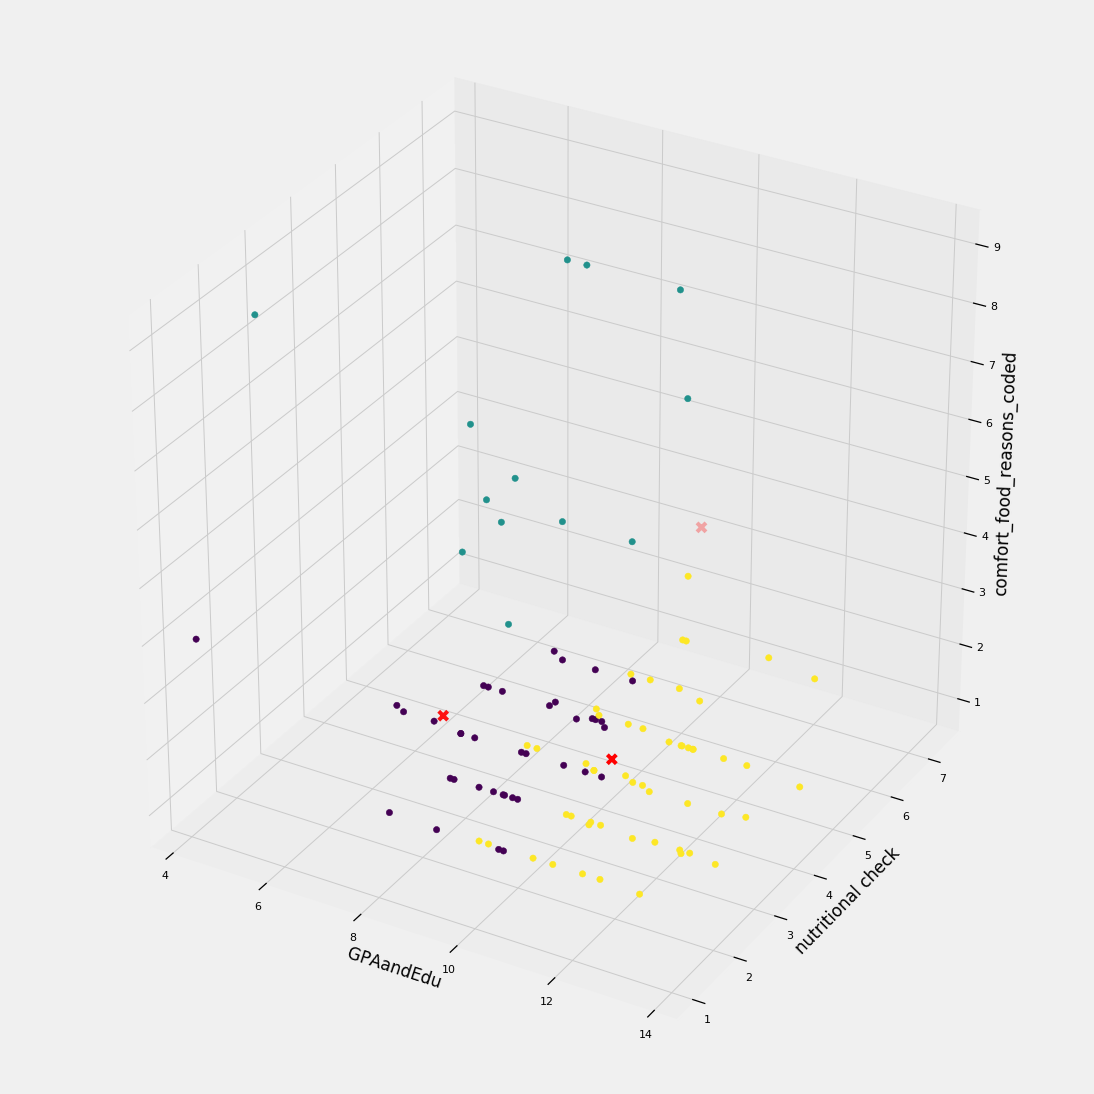

In [281]:
# Create scatterplot to present the random cendroids in the plot with red marker being random cendroids
subfooddata1 = subfooddata[['GPAandEdu','nutritional_check','comfort_food_reasons_coded']]
kmeans = KMeans(n_clusters=3).fit(subfooddata1)
centroids = kmeans.cluster_centers_
print(centroids)
fig = plt.figure()
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection = '3d')
ax = Axes3D(fig)
ax.scatter(subfooddata1['GPAandEdu'], subfooddata1['nutritional_check'],subfooddata1['comfort_food_reasons_coded'], c= kmeans.labels_.astype(float), s=40, alpha=1)
ax.scatter(centroids[:, 0], centroids[:, 2],centroids[:, 1], marker="x", c='red', s=80)
ax.set_xlabel('GPAandEdu')
ax.set_ylabel('nutritional check')
ax.set_zlabel('comfort_food_reasons_coded')

### Different Ways to create random cendroids according to the k that I determined

In [560]:
# Let's have a quick glance on what we have with our sub dataset
subfooddata2 = subfooddata[['GPAandEdu','nutritional_check']]
subfooddata2.head(5)

   GPAandEdu  nutritional_check
0      8.400                5.0
1      9.654                4.0
2      7.300                4.0
3      9.200                2.0
4     12.500                3.0

In [561]:
a = subfooddata2.columns
a[0]

'GPAandEdu'

In [562]:
# Let's create random location for random cendroids
dend1 = np.array([8,4])
dend2 = np.array([6,2])
dend3 = np.array([10,3])
print(dend1, dend2, dend3)

[8 4] [6 2] [10  3]


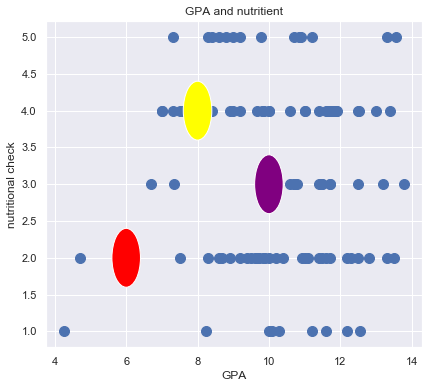

In [563]:
# Now we could create the plot to present the random cendroids in different location among 
# the distribution of the data
fig = plt.figure(figsize=(6,6))

plt.scatter(subfooddata2.GPAandEdu, subfooddata2.nutritional_check, s = 100)
plt.title('GPA and nutritient')
ax = fig.add_subplot(111)
ax.set_xlabel('GPA')
ax.set_ylabel('nutritional check')
circle1 = plt.Circle(dend1, radius=0.4, fc='yellow')
circle2 = plt.Circle(dend2, radius=0.4, fc='red')
circle3 = plt.Circle(dend3, radius=0.4, fc='purple')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)

In accordance to the plot above, It is significant to denote that GPA and nutritional check are related strongly to 
each other in term of eating habits of students. We could see from here that students with high GPA tends to have the 
habit of checking their nutritian while other having lower GPA tends to have the frequency of less checking their 
nutritient in the daily basis. 

### Function K means

In [564]:
k = 5

In [565]:
subfooddata2[[a[0],a[1]]].mean()

GPAandEdu            10.296553
nutritional_check     3.126214
dtype: float64

In [566]:
import numpy as np

GPAandEdu            8.472741
nutritional_check    4.222222
dtype: float64 GPAandEdu            9.026542
nutritional_check    1.833333
dtype: float64 GPAandEdu            11.829692
nutritional_check     3.153846
dtype: float64


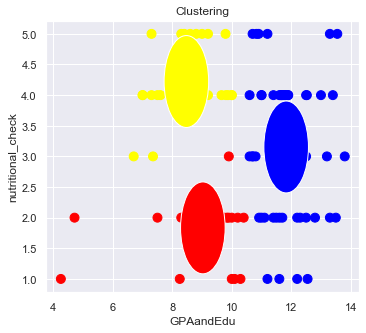

In [582]:
# Create the function needed to culster the data and itterate centroit using k means inputed 
def KMean(subfooddata2, k):
    a = subfooddata2.columns
    dend1 = np.array([8,4])
    dend2 = np.array([6,2])
    dend3 = np.array([10,3])
for x in range(1,10):
    subfooddata2["Dist_C1"] = np.sqrt((subfooddata2[a[0]] - dend1[0])**2 
                             + (subfooddata2[a[1]] - dend1[1])**2)
    subfooddata2["Dist_C2"] = np.sqrt((subfooddata2[a[0]] - dend2[0])**2 + 
                             (subfooddata2[a[1]] - dend2[1])**2)
    subfooddata2["Dist_C3"] = np.sqrt((subfooddata2[a[0]] - dend3[0])**2 + 
                             (subfooddata2[a[1]] - dend3[1])**2)

    subfooddata2["Association"] = np.where(
    (subfooddata2.Dist_C1 < subfooddata2.Dist_C2) & 
    (subfooddata2.Dist_C1 < subfooddata2.Dist_C3), 1, 
     np.where((subfooddata2.Dist_C2 < subfooddata2.Dist_C1) & 
    (subfooddata2.Dist_C2 < subfooddata2.Dist_C3) , 2 , 3))

    dend1 = subfooddata2[subfooddata2.Association == 1][[a[0],a[1]]].mean()
    dend2 = subfooddata2[subfooddata2.Association == 2][[a[0],a[1]]].mean()
    dend3 = subfooddata2[subfooddata2.Association == 3][[a[0],a[1]]].mean()
    x = x + 1
    if(x==10):
        break
    
fig = plt.figure(figsize=(5,5))
# Create a colormap
colormap = np.array(['black', 'yellow', 'red', 'blue'])
 
# Plot Sepal
plt.scatter(subfooddata2[a[0]], subfooddata2[a[1]], c=colormap[subfooddata2.Association], s = 80)
plt.title('Clustering')
ax = fig.add_subplot(111)
ax.set_xlabel(subfooddata2.columns[0])
ax.set_ylabel(subfooddata2.columns[1])
circle1 = plt.Circle(dend1, radius=0.75, fc='yellow')
circle2 = plt.Circle(dend2, radius=0.75, fc='red')
circle3 = plt.Circle(dend3, radius=0.75, fc='blue')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)
print(dend1,dend2,dend3)

<a id="Sklearn"></a>
<div>
    <h1><font color='Grey' size=6>
       5. Sklearn.cluster 
    </h1> 
</div>

***In this section, I would like to run again unsupervised k-means clusters, but this time using the sklearn.cluster
library***

In [642]:
subfooddata3 = subfooddata[['GPA','comfort_food_reasons_coded']]

In [643]:
subfooddata3.head(5)

     GPA  comfort_food_reasons_coded
0  2.400                         9.0
1  3.654                         1.0
2  3.300                         1.0
3  3.200                         2.0
4  3.500                         1.0

In [644]:
# Kmean cluster
from sklearn.cluster import KMeans
#Initializing K-means with 2 clusters
k_means = KMeans(n_clusters = 3)
#Fitting the model on the data
k_means.fit(subfooddata3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [645]:
#Extracting labels 
target_labels = k_means.predict(subfooddata3)
#Printing the labels
target_labels

array([1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0,
       2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 0, 2, 1, 0], dtype=int32)

Text(0, 0.5, 'comfort_food_reasons_coded')

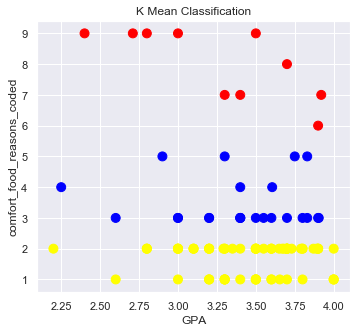

In [646]:
# View the results
# Set the size of the plot
fig = plt.figure(figsize=(5, 5))
 
# Create a colormap
colormap = np.array(['yellow', 'red', 'blue'])
 
plt.scatter(subfooddata3.GPA, subfooddata3.comfort_food_reasons_coded, c=colormap[target_labels], s = 80)
plt.title('K Mean Classification')
ax = fig.add_subplot(111)
ax.set_xlabel('GPA')
ax.set_ylabel('comfort_food_reasons_coded')

<a id="Predict"></a>
<div>
    <h1><font color='Grey' size=6>
       6.1 Predicition Mesh
    </h1> 
</div>

I will utilize the model created in the last section to create prediction mesh in this section so we could clearly
see the barrier and characteristic of data after clustering which are divided clearly into different sections. 

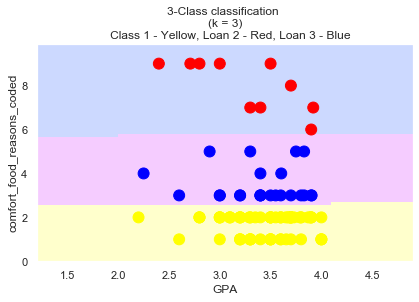

In [651]:
def plotMesh():
    h = 0.1
    # Create color maps
    cmap_light = ListedColormap(['#ffffcc', '#ff8080','#ccd9ff','#f5ccff'])
    colormap = np.array(['yellow', 'red', 'blue','black'])

    x_min, x_max = subfooddata3.GPA.min() - 1, subfooddata3.GPA.max() + 1
    y_min, y_max = subfooddata3.comfort_food_reasons_coded.min() - 1, subfooddata3.comfort_food_reasons_coded.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

    # Plot also the training points
    plt.scatter(subfooddata3.GPA, subfooddata3.comfort_food_reasons_coded, c = colormap[k_means.labels_], s = 120)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification \n(k = %i)\n\
   Class 1 - Yellow, Loan 2 - Red, Loan 3 - Blue" % (3))
    ax = fig.add_subplot(111)
    ax.set_xlabel('GPA')
    ax.set_ylabel('comfort_food_reasons_coded')
plotMesh()

<a id="Predict"></a>
<div>
    <h1><font color='Grey' size=6>
       6.2 Predicition 
    </h1> 
</div>

***Create a function that accepts up to 3 to 5 parameters, which represent the characteristics of the student, and will print coupons according to the cluster the student belongs to. Run your algorithm 10 times with different parameters.***

In [652]:
# Let's recreate another model using sklearn cluster for this section
# since I want to focus on the relationship between GPA and nutritional check
subfooddata4 = subfooddata[['GPA','nutritional_check','veggies_day']]
# Kmean cluster
from sklearn.cluster import KMeans
#Initializing K-means with 2 clusters
k_means = KMeans(n_clusters = 4)
#Fitting the model on the data
k_means.fit(subfooddata4)
#Extracting labels 
target_labels1 = k_means.predict(subfooddata4)
#Printing the labels
target_labels1

array([1, 3, 1, 2, 3, 2, 3, 3, 2, 1, 0, 1, 2, 0, 0, 2, 1, 3, 0, 2, 2, 3,
       3, 0, 0, 3, 2, 1, 3, 0, 1, 1, 1, 3, 3, 0, 0, 3, 3, 2, 3, 1, 0, 1,
       0, 3, 0, 0, 2, 1, 1, 1, 0, 1, 3, 1, 1, 0, 0, 1, 3, 1, 1, 2, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 3, 2, 2, 3, 3, 2, 2, 3, 3, 1, 3, 1, 0, 1, 1,
       0, 2, 0, 0, 1, 3, 2, 1, 3, 0, 0, 1, 1, 1, 2], dtype=int32)

TypeError: 'Text' object is not callable

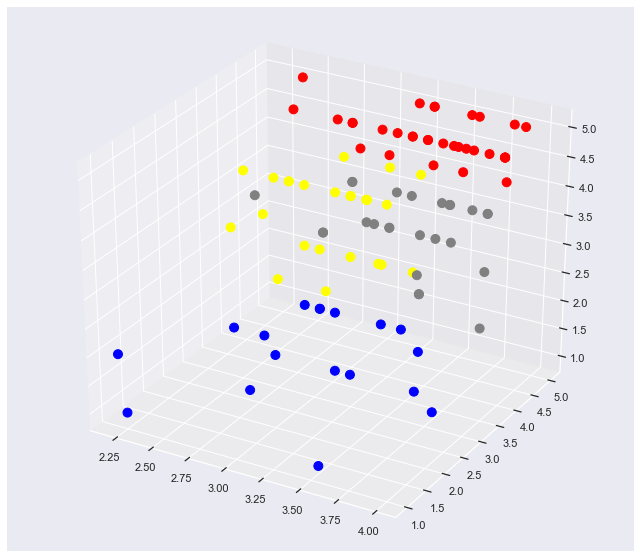

In [661]:
# View the results
# Set the size of the plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

 # Create a colormap
colormap = np.array(['yellow', 'red', 'blue','grey'])
 
ax.scatter(subfooddata4.GPA, subfooddata4.nutritional_check,subfooddata4.veggies_day, c=colormap[target_labels1], s = 80,depthshade = False)
ax.title("K Mean Classification")
ax = fig.add_subplot(111)
ax.set_xlabel('GPA')
ax.set_ylabel('nutritional_check')
ax.set_zlabel('veggies_day')

ax.show()


In [706]:
# Create a function that accept 3,5 parameters and return the predicted colors coupon
# I will then run my algorithm 10 times with different parameters.
def find(a,b,c):
 colormap = np.array(['yellow', 'blue', 'red','grey'])

 GPA = float(a)
 nutritional_check = float(b)
 veggies_day= float(c)
 data_class = k_means.predict(np.array([GPA, nutritional_check,veggies_day]).reshape(1, -1))[0]
 print(colormap[data_class])

In [707]:
def find2():
 colormap = np.array(['yellow', 'blue', 'red','grey'])

 GPA = float(input('GPA Span : '))
 nutritional_check = float(input('nutritional check: '))
 veggies_day= float(input('Veggies day Span : '))
 data_class = k_means.predict(np.array([GPA, nutritional_check,veggies_day]).reshape(1, -1))[0]
 print(colormap[data_class])

In [710]:
# Let's try both function that I just created
# First function is manually enter parameter
find(2,3,4)
# Second function will ask for users input
find2()
# Let's compare the result

grey
GPA Span : 2
nutritional check: 3
Veggies day Span : 4
grey


***Second time running***

In [712]:
find(3,5,9)
find2()

blue
GPA Span : 3
nutritional check: 5
Veggies day Span : 9
blue


***Third time running***

In [714]:
find(1,1,1)
find2()

red
GPA Span : 1
nutritional check: 1
Veggies day Span : 1
red


***Fourth time running***

In [715]:
find(3,4,7)

blue


In [716]:
find2()

GPA Span : 3
nutritional check: 4
Veggies day Span : 7
blue


***Fifth time running***

In [717]:
find(3,8,9)

blue


In [718]:
find2()

GPA Span : 3
nutritional check: 8
Veggies day Span : 9
blue


***Sixth time running***

In [719]:
find(1,1,0)

red


In [721]:
find2()

GPA Span : 1
nutritional check: 1
Veggies day Span : 0
red


***Seventh time running***

In [ ]:
find(2,3,9)

In [723]:
find2()

GPA Span : 2
nutritional check: 3
Veggies day Span : 9
blue


***Eighth time running***

In [ ]:
find(3,3,7)

In [724]:
find2()

GPA Span : 3
nutritional check: 3
Veggies day Span : 7
blue


***Ninth time running***

In [725]:
find(3,5,2)

grey


In [726]:
find2()

GPA Span : 3
nutritional check: 5
Veggies day Span : 2
grey


***Ten time running***

In [727]:
find(2,3,1)

red


In [728]:
find2()

GPA Span : 2
nutritional check: 3
Veggies day Span : 1
red


After this section, It is significant to define that GPA is really correlated to nutritional checking habit and veggies 
day of the students. Students tend to have veggies day as well as checking their nutritional will tend to have high
ability in term of GPA and further education. I will base on the algorithm that I created to provide coupon for
student accordingly.

<a id="Sum"></a>
<div>
    <h1><font color='Grey' size=6>
       7. Summary
    </h1> 
</div>

In accordance to the plot, It is significant to denote that GPA and nutritional check are related strongly to 
each other in term of eating habits of students. We could see from here that students with high GPA tends to have the 
habit of checking their nutritian while other having lower GPA tends to have the frequency of less checking their 
nutritient in the daily basis. In overall, I would like to demonstrate the fact that it looks like the best way to cluster data is with the kmeans 
number being 3 rather than 4 since the pattern of data and the grouping in accordance to dendogram and other technique
that I have used in this section. I would like to define K means as 3 as an ideal to dig deeper into further of the
report.After exploration of the data, It is significant to define that students of University of Pacific tends to enjoy italian
food as well as have high possibility to pay meal out and enjoy veggies day.After this section, It is significant to define that GPA is really correlated to nutritional checking habit and veggies 
day of the students. Students tend to have veggies day as well as checking their nutritional will tend to have high
ability in term of GPA and further education. I will base on the algorithm that I created to provide coupon for
student accordingly.

<image src= "https://lh3.googleusercontent.com/04U43pTZTZIvb-9jU4IuF4fbxryUVLHO0Tl9FoOytIrm66ThqDX8REczzoE7_7V1KBO06WehXlGG-m78yeWSFTWLCavFpmCKcvJMictN2SnpoJtcXBZSYLor01f0vhRYSGlJq0H_zA=w2400" style="width: 450px;"/>

<img src='https://lh3.googleusercontent.com/04U43pTZTZIvb-9jU4IuF4fbxryUVLHO0Tl9FoOytIrm66ThqDX8REczzoE7_7V1KBO06WehXlGG-m78yeWSFTWLCavFpmCKcvJMictN2SnpoJtcXBZSYLor01f0vhRYSGlJq0H_zA=w2400' />